In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('France(_25).csv')

In [ ]:
df.head()

,attraction,score,review,title,trip_date
0,Musée d'Orsay,4.5,NaN,NaN,NaN
1,Musée d'Orsay,5.0,A wonder to see all this famous art like Monet...,A wonder to see all this famous art,Nov 2021
2,Musée d'Orsay,5.0,The Orsay is a wonderful museum in a beautiful...,Favorite museum in Paris!,Oct 2021
3,Musée d'Orsay,5.0,"It was unfortunately a short visit, but it was...",Amazing paintings,Oct 2021
4,Musée d'Orsay,4.0,"very nice very beautiful, i am so happy, very ...",very good,Aug 2021


In [ ]:
del df['title']
del df['trip_date']

In [ ]:
df.head()

,attraction,score,review
0,Musée d'Orsay,4.5,NaN
1,Musée d'Orsay,5.0,A wonder to see all this famous art like Monet...
2,Musée d'Orsay,5.0,The Orsay is a wonderful museum in a beautiful...
3,Musée d'Orsay,5.0,"It was unfortunately a short visit, but it was..."
4,Musée d'Orsay,4.0,"very nice very beautiful, i am so happy, very ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18804 entries, 0 to 18803
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attraction  18804 non-null  object 
 1   score       18804 non-null  float64
 2   review      18779 non-null  object 
dtypes: float64(1), object(2)
memory usage: 440.8+ KB


In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18779 entries, 1 to 18803
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attraction  18779 non-null  object 
 1   score       18779 non-null  float64
 2   review      18779 non-null  object 
dtypes: float64(1), object(2)
memory usage: 586.8+ KB


In [ ]:
df.head()

,attraction,score,review
1,Musée d'Orsay,5.0,A wonder to see all this famous art like Monet...
2,Musée d'Orsay,5.0,The Orsay is a wonderful museum in a beautiful...
3,Musée d'Orsay,5.0,"It was unfortunately a short visit, but it was..."
4,Musée d'Orsay,4.0,"very nice very beautiful, i am so happy, very ..."
5,Musée d'Orsay,5.0,This was my favorite museum in Paris. I loved ...


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sskym\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

def text_cleaning(text):
    example = text
    stop_words = set(stopwords.words('english'))

    tokenizer = RegexpTokenizer(r"\w+")
    word_tokens = tokenizer.tokenize(example)

    result = []
    for w in word_tokens:
        if w not in stop_words:
            result.append(w)

    return result

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x : text_cleaning(x))
bow_vect = vect.fit_transform(df['review'].tolist())
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

In [ ]:
word_list

['0',
 '00',
 '000',
 '0000',
 '000ft',
 '000m',
 '000m2',
 '000s',
 '000th',
 '00am',
 '00e',
 '00h',
 '00noon',
 '00pm',
 '01',
 '02',
 '03',
 '04',
 '05',
 '0545',
 '06',
 '0615',
 '0630',
 '07',
 '0715',
 '0745',
 '08',
 '0830',
 '08h00',
 '09',
 '0900',
 '0915',
 '0920',
 '0930',
 '0945',
 '0and',
 '0c',
 '0lanning',
 '1',
 '10',
 '100',
 '1000',
 '10000000',
 '1000000000',
 '1000ft',
 '1000m',
 '1000years',
 '1007',
 '100euro',
 '100m',
 '100mins',
 '100s',
 '100th',
 '1015',
 '102',
 '1020',
 '1027',
 '1030',
 '1030am',
 '1035',
 '1045',
 '105',
 '1050',
 '107',
 '10a',
 '10am',
 '10c',
 '10min',
 '10mins',
 '10minutes',
 '10people',
 '10pm',
 '10th',
 '10x',
 '10y',
 '11',
 '110',
 '1100',
 '1100am',
 '1100hrs',
 '1100masl',
 '110euro',
 '112',
 '1130',
 '115',
 '1156',
 '1157',
 '1176',
 '1190',
 '11am',
 '11e',
 '11h00',
 '11pm',
 '11th',
 '11yo',
 '11yr',
 '12',
 '120',
 '1200',
 '12000',
 '1200s',
 '120km',
 '120mins',
 '1210',
 '1211',
 '1214',
 '1223',
 '1225',
 '123',
 '

In [ ]:
count_list

array([ 20, 118,  50, ...,   1,   1,   1], dtype=int64)

In [ ]:
bow_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
bow_vect.shape

(18779, 23474)

In [ ]:
word_count_dict = dict(zip(word_list, count_list))

In [ ]:
word_count_dict

{'0': 20,
 '00': 118,
 '000': 50,
 '0000': 1,
 '000ft': 2,
 '000m': 2,
 '000m2': 1,
 '000s': 1,
 '000th': 1,
 '00am': 8,
 '00e': 1,
 '00h': 1,
 '00noon': 1,
 '00pm': 5,
 '01': 5,
 '02': 2,
 '03': 1,
 '04': 1,
 '05': 2,
 '0545': 1,
 '06': 3,
 '0615': 2,
 '0630': 1,
 '07': 5,
 '0715': 1,
 '0745': 1,
 '08': 8,
 '0830': 5,
 '08h00': 1,
 '09': 10,
 '0900': 1,
 '0915': 2,
 '0920': 1,
 '0930': 7,
 '0945': 4,
 '0and': 1,
 '0c': 1,
 '0lanning': 1,
 '1': 616,
 '10': 498,
 '100': 105,
 '1000': 30,
 '10000000': 1,
 '1000000000': 1,
 '1000ft': 1,
 '1000m': 6,
 '1000years': 1,
 '1007': 1,
 '100euro': 1,
 '100m': 4,
 '100mins': 2,
 '100s': 4,
 '100th': 1,
 '1015': 10,
 '102': 1,
 '1020': 1,
 '1027': 2,
 '1030': 2,
 '1030am': 1,
 '1035': 1,
 '1045': 1,
 '105': 2,
 '1050': 1,
 '107': 3,
 '10a': 1,
 '10am': 52,
 '10c': 2,
 '10min': 2,
 '10mins': 7,
 '10minutes': 2,
 '10people': 1,
 '10pm': 16,
 '10th': 8,
 '10x': 1,
 '10y': 2,
 '11': 147,
 '110': 6,
 '1100': 2,
 '1100am': 2,
 '1100hrs': 1,
 '1100masl': 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)

(18779, 23474)


In [ ]:
print(tf_idf_vect[0])

  (0, 22940)	0.24800577740217108
  (0, 22702)	0.12070329187037782
  (0, 22464)	0.18248551145729938
  (0, 22032)	0.23821533834372133
  (0, 20893)	0.4224104282484932
  (0, 20845)	0.1934070672313375
  (0, 18286)	0.11044797333200104
  (0, 14615)	0.272097116874094
  (0, 13529)	0.24268439989078544
  (0, 12257)	0.18875020853387456
  (0, 12218)	0.14142799280322696
  (0, 9585)	0.2461553637981804
  (0, 9417)	0.12080711952535307
  (0, 8263)	0.21715086141994044
  (0, 7162)	0.17248390872984495
  (0, 7061)	0.21287030050214242
  (0, 6196)	0.24994228711090305
  (0, 5613)	0.26731930467219467
  (0, 2089)	0.16722836490113938
  (0, 1245)	0.24078575053191514


In [ ]:
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 23474)
[[0. 0. 0. ... 0. 0. 0.]]


In [ ]:
vect.vocabulary_

{'wonder': 22940,
 'see': 18286,
 'famous': 8263,
 'art': 2089,
 'like': 12218,
 'monet': 13529,
 'degas': 6196,
 'van': 22032,
 'gogh': 9585,
 'get': 9417,
 'ticket': 20845,
 'advance': 1245,
 'timeslots': 20893,
 'due': 7061,
 'covid': 5613,
 'wait': 22464,
 'line': 12257,
 'easy': 7162,
 'well': 22702,
 'organized': 14615,
 'orsay': 14651,
 'wonderful': 22944,
 'museum': 13800,
 'beautiful': 2777,
 'old': 14448,
 'train': 21191,
 'station': 19612,
 'seine': 18313,
 'light': 12192,
 'bright': 3511,
 'calm': 3848,
 'feeling': 8400,
 'enjoy': 7524,
 'impressionist': 10850,
 'collection': 4949,
 'star': 19575,
 'suggest': 19995,
 'start': 19590,
 'top': 21036,
 'floor': 8688,
 'giant': 9433,
 'clock': 4802,
 'face': 8184,
 'work': 22982,
 'way': 22629,
 'great': 9769,
 'go': 9564,
 'thursday': 20833,
 'evenings': 7819,
 'open': 14521,
 '9': 908,
 '45pm': 697,
 'less': 12112,
 'people': 15267,
 'audio': 2313,
 'tour': 21092,
 'small': 18963,
 'extra': 8128,
 'fee': 8395,
 'good': 9608,
 

In [ ]:
invert_index_vectorizer = {v:k for k,v in vect.vocabulary_.items()}
print(str(invert_index_vectorizer)[:100]+'...')

{22940: 'wonder', 18286: 'see', 8263: 'famous', 2089: 'art', 12218: 'like', 13529: 'monet', 6196: 'd...


<AxesSubplot:>

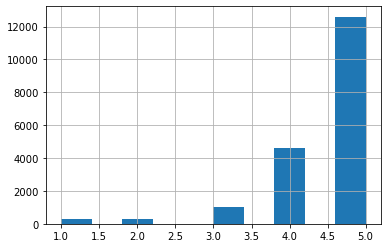

In [ ]:
df['score'].hist()

In [ ]:
def rating_to_label(rating):
    if rating > 3:
        return 1
    else:
        return 0

df['y'] = df['score'].apply(lambda x:rating_to_label(x))

In [ ]:
df.head()

,attraction,score,review,y
1,Musée d'Orsay,5.0,A wonder to see all this famous art like Monet...,1
2,Musée d'Orsay,5.0,The Orsay is a wonderful museum in a beautiful...,1
3,Musée d'Orsay,5.0,"It was unfortunately a short visit, but it was...",1
4,Musée d'Orsay,4.0,"very nice very beautiful, i am so happy, very ...",1
5,Musée d'Orsay,5.0,This was my favorite museum in Paris. I loved ...,1


In [ ]:
df['y'].value_counts()

1    17201
0     1578
Name: y, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)

In [ ]:
x_train.shape, x_test.shape

((13145, 23474), (5634, 23474))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.92
precision: 0.92
recall: 1.00
F1: 0.96


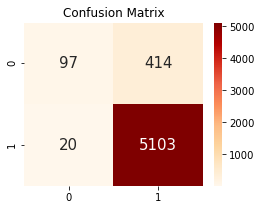

In [ ]:
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
lr2 = LogisticRegression(random_state = 2045)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [ ]:
print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))

accuracy: 0.92
precision: 0.92
recall: 1.00
F1: 0.96


In [ ]:
lr2.coef_

array([[-0.06709206,  0.14757366,  0.15081467, ...,  0.010415  ,
         0.010415  ,  0.        ]])

In [ ]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])

[(3.7576108937551127, 9769), (3.6201966123135163, 1613), (3.441972145108928, 2777), (3.1742756040261515, 13821), (2.273581397326088, 22944)]
[(-2.7230708869634497, 15267), (-2.932164139124186, 4819), (-3.0838337413915458, 6579), (-3.568452918509556, 6578), (-3.93228629788265, 14195)]


In [ ]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(3.7576108937551127, 9769),
 (3.6201966123135163, 1613),
 (3.441972145108928, 2777),
 (3.1742756040261515, 13821),
 (2.273581397326088, 22944),
 (2.2643080564905858, 12484),
 (2.208491242785801, 16864),
 (2.180672889575578, 22256),
 (2.1767601017178633, 12490),
 (2.1483815135969637, 8286),
 (2.0969587504584, 22702),
 (2.0333327343416627, 7529),
 (1.974271830355702, 19903),
 (1.749312349079835, 13406),
 (1.5665878442629826, 10362),
 (1.5272928232819274, 4159),
 (1.5214629575305738, 22163),
 (1.520284975262117, 11889),
 (1.5174135605364525, 6184),
 (1.452594834398518, 3474),
 (1.4407863483413155, 4686),
 (1.3841830700770221, 15711),
 (1.3829047346616503, 12658),
 (1.369064650496144, 10299),
 (1.3409616650619258, 10946),
 (1.3297166098113564, 9634),
 (1.262978743961505, 9053),
 (1.2560862626120974, 998),
 (1.2410983594026934, 22996),
 (1.2231796453567327, 22496),
 (1.207714039901986, 15289),
 (1.1821526234317268, 19812),
 (1.1811175555731805, 19730),
 (1.1764915541898338, 12458),
 (1.152

In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer



{22940: 'wonder',
 18286: 'see',
 8263: 'famous',
 2089: 'art',
 12218: 'like',
 13529: 'monet',
 6196: 'degas',
 22032: 'van',
 9585: 'gogh',
 9417: 'get',
 20845: 'ticket',
 1245: 'advance',
 20893: 'timeslots',
 7061: 'due',
 5613: 'covid',
 22464: 'wait',
 12257: 'line',
 7162: 'easy',
 22702: 'well',
 14615: 'organized',
 14651: 'orsay',
 22944: 'wonderful',
 13800: 'museum',
 2777: 'beautiful',
 14448: 'old',
 21191: 'train',
 19612: 'station',
 18313: 'seine',
 12192: 'light',
 3511: 'bright',
 3848: 'calm',
 8400: 'feeling',
 7524: 'enjoy',
 10850: 'impressionist',
 4949: 'collection',
 19575: 'star',
 19995: 'suggest',
 19590: 'start',
 21036: 'top',
 8688: 'floor',
 9433: 'giant',
 4802: 'clock',
 8184: 'face',
 22982: 'work',
 22629: 'way',
 9769: 'great',
 9564: 'go',
 20833: 'thursday',
 7819: 'evenings',
 14521: 'open',
 908: '9',
 697: '45pm',
 12112: 'less',
 15267: 'people',
 2313: 'audio',
 21092: 'tour',
 18963: 'small',
 8128: 'extra',
 8395: 'fee',
 9608: 'good',
 

In [ ]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



great 3.7576108937551127
amazing 3.6201966123135163
beautiful 3.441972145108928
must 3.1742756040261515
wonderful 2.273581397326088
loved 2.2643080564905858
recommend 2.208491242785801
views 2.180672889575578
lovely 2.1767601017178633
fantastic 2.1483815135969637
well 2.0969587504584
enjoyed 2.0333327343416627
stunning 1.974271830355702
miss 1.749312349079835
history 1.5665878442629826
cathedral 1.5272928232819274
versailles 1.5214629575305738
lake 1.520284975262117
definitely 1.5174135605364525
breathtaking 1.452594834398518


In [ ]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])



nothing -3.93228629788265
disappointed -3.568452918509556
disappointing -3.0838337413915458
closed -2.932164139124186
people -2.7230708869634497
ok -2.690253369444835
money -2.6347852447234326
else -2.403856855954311
rides -2.3039109801289817
waste -2.215321414997016
much -2.154448489435908
however -2.0988613997433485
average -1.9642556795501473
anything -1.943850499460144
would -1.9291279468449234
know -1.841200121467607
poor -1.819833593588485
worst -1.8093747060488918
tourists -1.8077943143303787
terrible -1.777300118611827
